<a href="https://colab.research.google.com/github/Raeus1901/QMSS/blob/main/hmw_3_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns; sns.set()  # for plot styling

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_digits
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.stats import mode
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering



In [ ]:
   from google.colab import drive

   drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
red_wine_df = pd.read_csv("/content/drive/My Drive/winequality-red.csv", sep = ';')
print(red_wine_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
red_wine_df.mean()

In [ ]:
red_wine_df.var()

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
dtype: float64

In [ ]:
red_wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

1. Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.)

Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?

Before running the K-mean clusters algorithm, it is important to rethink about the benefits and challenges in using such method:


1) The model is personalized: You can choose the number of clusters but make sure the selected number of clusters is proportional to the sample and features of the dataset.


2) For each point in the algorithm, they remain closer to their respective cluster than the others. However, a challenge is defining the boundaries between these clusters when the data distribution is non-continous, non-normal, spread out asymmetrically: It becomes increasingly difficult to define clear boundaries between the clusters when the data geometry is complex as the K-means algorithm will always be linear


3) The algorithm features extensive parameters but at the risk of running slowly when dealing with a large dataset. Hopefully the red_wine dataset only has thousands of observation so that should be ok.

In response to these statements, let's analyze the univariate distribution, the number of observations and the number features in the red wine dataset.
Let's analyze total sulfur dioxide as it seems to be the most spread out of the variables in the dataset based upon the results shown when printing the head.


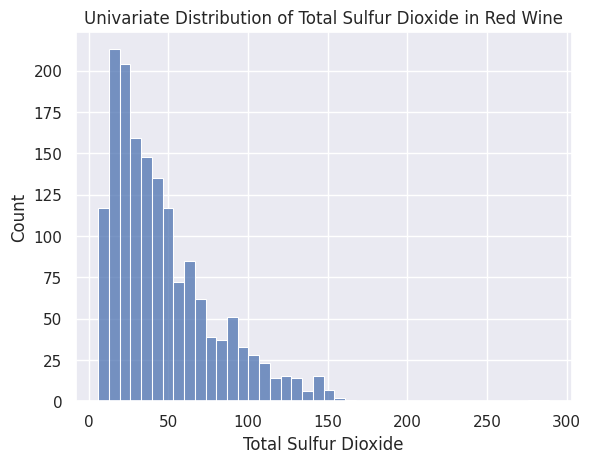

In [ ]:
sns.histplot(red_wine_df['total sulfur dioxide'], kde=False)
plt.title('Univariate Distribution of Total Sulfur Dioxide in Red Wine')
plt.xlabel('Total Sulfur Dioxide')  # Label for the x-axis
plt.show()

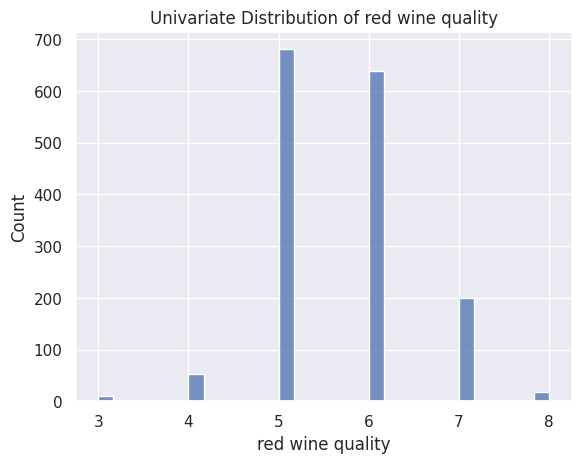

In [ ]:
sns.histplot(red_wine_df['quality'], kde=False)
plt.title('Univariate Distribution of red wine quality')
plt.xlabel('red wine quality')  # Label for the x-axis
plt.show()

It seems the distribution is skewed to the left for total sulfur dioxide. Because the data is non-normally distributed, one can expect the algorithm to produce results that could be counter-intuitive at least for the total sulfur dioxide variable.


We will now consider the amount of samples (observations) and features.

In [ ]:
# Assuming your DataFrame is named red_wine_df
num_samples, num_features = red_wine_df.shape

print(red_wine_df.shape)


(1599, 12)


So we have 1599 samples for 12 features in the dataset. Given the small size of the dataset, one should not preocupy about the running time in producing the K-mean cluster algorithm

A final step before running the K cluster mean algotihm is to set the K score. The best way to do it is through a method such as the elbow curve: This method involves running K-means clustering on the dataset for a range of values of k (num_clusters), and then for each value of k, calculate the sum of squared distances from each point to its assigned center.  When these overall distances are plotted against k, the "elbow" of the curve represents an optimal value for k. The goal is to choose a small value of k that has a low sum of squared distances.

Instaed to the elbow, I will choose a more sophisticated method such as the silhouette score. I found the silhouette method better to deal with non-normal distributed data such as the red wine as it better captures complex distribution thanks to its sophisticated structure: This method measures how similar an object is to its own cluster compared to other clusters. The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If the majority of objects have a high value, then the clustering configuration is appropriate.

We will test the score an [2; 11] interval as to count the number of variables between 2 to 10 in respect to the 12 number of features.


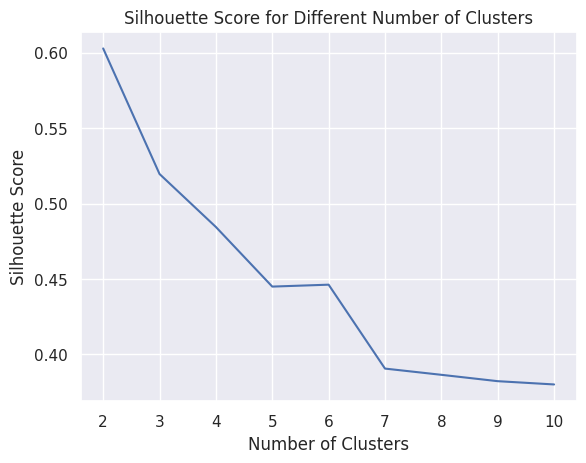

In [ ]:
silhouette_scores = []

# Trying different numbers of clusters
for k in range(2, 11):  # Starting from 2 since silhouette score cannot be calculated for k=1
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(red_wine_df)
    score = silhouette_score(red_wine_df, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Based on the above graph, it seems that selecting a k score of 2 is the most relevant choices given that the silhouette score is the highest for 2 clusters; showing the best match to each point to their clusters in respect to the chosen k value.

Therefore, we will deal with the data as we would in a binary format so from 0 to 1 such as belonging to a [0;1] interval. No need to implement a random state as the result would be the same no matter the amount of random simulation due to the binary structure.

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(red_wine_df)
kmeans.cluster_centers_.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(2, 12)

The result is 2 clusters in 12 dimensions. Notice that the cluster centers themselves are 12-dimensional points, and can themselves be interpreted as the "typical" red wine feature within the cluster.

Finally, now we can run the K mean clustering algorithm based upon the afermentioned information.

In [ ]:
X = pd.DataFrame(scale(red_wine_df), index=red_wine_df.index, columns=red_wine_df.columns)

In [ ]:
km1 = KMeans(n_clusters=2, n_init=10)
km1.fit(X)

KMeans(n_clusters=2, n_init=10)

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)
kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
km1.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

Notice how the algorithm randomly shuffle the continous variables in a [0;1] interval.
Now let's print the mean of the K-clusters.

In [ ]:
print(y_kmeans[0:4])

[1 1 1 0]


Normally the mean would keep changing for each attempt to run the algorithm. It is the case for every instance the mean and labels are calculated once again.

In [ ]:
# We can also extract the final cluster centroid locations
print(kmeans.cluster_centers_) # higher dimensional data will have row-wise elements that are the same length as
                               # the number of features in the X data

[[ 0.88990137 -0.73110409  0.9965889   0.12765141  0.23406384 -0.1791359
  -0.24908472  0.39148407 -0.67929865  0.56891215  0.29126345  0.46574646]
 [-0.50926509  0.41838995 -0.57031931 -0.07305125 -0.13394804  0.10251435
   0.14254406 -0.22403513  0.38874318 -0.32557215 -0.16668174 -0.26653337]]


Now we got the final K-mean cluster distribution for the two defined clusters within a twelve dimensional space. All the 1599 samples points should fall within that distribution theoritcally.

Let's plot the distribution

In [ ]:
# Add new labels to original data and explore what clusters mean by evaluating column means.

X['cluster'] = km1.labels_

 # means for full scaled data
display(X.groupby('cluster').mean()) #cluster means

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,0.887405,-0.731428,0.996236,0.126634,0.232428,-0.179628,-0.246302,0.390812,-0.676331,0.565789,0.289388,0.461453
1,-0.510586,0.420842,-0.573204,-0.072861,-0.133732,0.103352,0.141714,-0.224861,0.389140,-0.325538,-0.166505,-0.265506


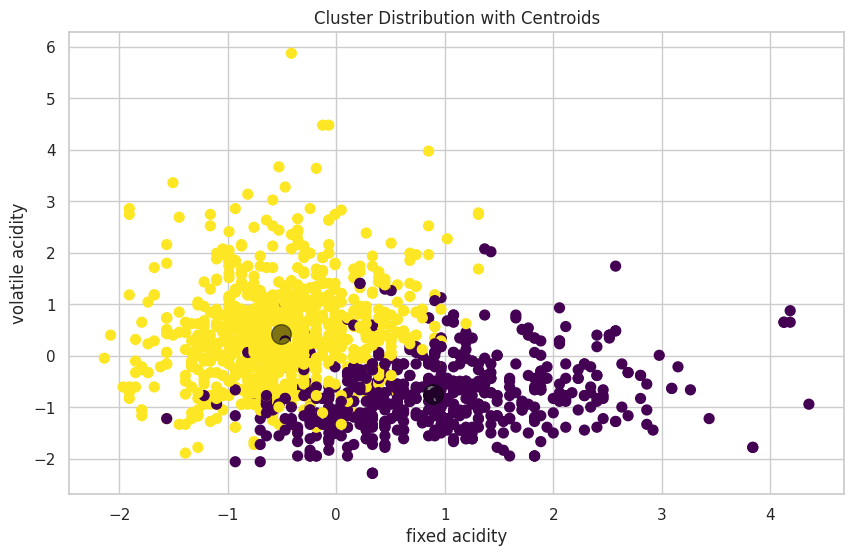

In [ ]:
# Assuming 'X' is a DataFrame with numerical columns. Let's assume the first two features are named 'feature1' and 'feature2'.
# Also assuming 'y_kmeans' contains the cluster labels.

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plotting the original data colored by KMeans clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['fixed acidity'], X['volatile acidity'], c=y_kmeans, s=50, cmap='viridis')

# Extracting the final centroids from each cluster
centers = kmeans.cluster_centers_
# Assuming that 'centers' is a NumPy array and we want to plot the first two columns as x and y coordinates
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.title('Cluster Distribution with Centroids')
plt.xlabel('fixed acidity')
plt.ylabel('volatile acidity')
plt.show()

So far it seems the k mean algorithm understood the dataset as there is a clear difference between volatile acidity and fixed acidity. The centroids are well-distanced and they seem to have a boarder between the two set. Some overlap between the two but nothing too bad given the complexity in making wine.

What does all these results mean and how did they define the clusters they fall within ? Simply put, one should re-think about the question, specifically to the following statement: **If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?**

The question implies the two clusters were divided in such way to draw a comparison between a good and a worse bottle of wine. Now we know that quality is the only int64 variable meaning it can only have whole numbers whereas the other variables in the dataset are all float values. We can suggest that the float values are the variables which define the quality of the wine. Therefore, one cluster is about a good bottle of wine and the other is not a good bottle fo wine as shown by their respective score of 0.4635 for cluster 0 and -0.266 for cluster 1. Nevethless, both bottles are way below the quality mean of 5.63 (we will come back to that point)

Based on the produced table, it seems that factors that contribute positively to a good wine (e.g positive correlation) are fixed acicidity, citric acid, residual sugar, chlorides, density, sulphates and alcohol (??). Factors negatively correlated to wine quality are volatile acidity, free sulfur dioxide, total sulfure dioxide and ph. Alcohol seem to be more or less of a personalized suggestion so let's put it aside.

So to make a good bottle of red wine, you priotize a higher level of acidity to give a strong taste. Then, acid and sugar can be added to give the taste more pronunced and softer. A good red should not be too sweet neither, so you make sure to have a positive chloride level. Finally, you add sulfites to your wine to make the taste ever-lasting and to preserve the wine for a longer period (side note: natural wines don't have any sulfites as to preserve the natural aroma of the red's components, and yet these natural wines tend to be the most succesful winners in competion ! So sulfite is a very subjective choice ;). Also, you need to make sure to minimize the volatile acidity so the taste remains consistent. Neither would you like the wine to contains too much S02 or it will lose its tatse due to much preservative. Finally, make sure the pH is not too high (not above 3.6 please) or it will taste like soap. So next time you go look for a wine in your spirit shop, consider these factors to maximize the quality and have a good time !

To get back to the previous point, the data was transformed in a binary format meaning that every distribution accross variables were converted on a [0;1] interval hence why the quality mean is much higher than in the clusters. This significantly reduces the accuracy of this analysis as  you should definitely not produce a wine with a 0.4 ph. What this analysis help is to find the factors that positively/negatively correlate to wine as to get an idea on producing quality wines. Yet, it was the best way to equalize the variance accross the variables as they share significant differences in their deviation. The numbers should be interpreted by their signs, not their actual significance.

2. Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1.

Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering? Present any figures that assist you in your analysis.

Hierarchical clustering differs from k mean due to its more complex structure similar to a binary tree. We do not know how many clusters we want. Instead, we want to produce a dendogram to show each possible numbers of clusters.

Let's begin by assigning labels in the dataset respective to the columns variables.

In [ ]:
if 'labels' not in locals():
    labels = red_wine_df.index.tolist()  # Replace 'df' with the name of your DataFrame


Then we run a distance matrix to get a vizualisation (the model is not accurate given it assumes there is an equal proportion of columns and row).

In [ ]:
# squareform creates an adjacency matrix and pdist applies euclidean distance to each combo of observations
row_distances = pd.DataFrame(squareform(pdist(red_wine_df, metric='euclidean')),
                             columns=labels,  # using the DataFrame's index as column labels
                             index=labels)    # using the DataFrame's index as row labels

# Display the distance matrix
display(row_distances)

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0.000000,35.860192,20.409705,26.985420,0.000000,6.325472,25.326029,13.779881,16.254766,68.404041,...,48.832156,15.271173,9.945626,19.105685,17.505958,23.316960,32.858071,19.105685,23.322597,11.036643
0,35.860192,0.000000,16.404589,11.257696,35.860192,29.565511,12.857342,47.142170,51.590491,36.085200,...,13.745266,32.129361,42.107874,27.385901,29.201419,24.115708,21.423328,27.385901,24.131680,26.101020
0,20.409705,16.404589,0.000000,7.296300,20.409705,14.165186,5.071906,33.084192,36.554474,48.199803,...,29.207708,22.109476,28.205303,19.919750,20.671872,19.804247,24.325055,19.919750,19.823713,12.679709
0,26.985420,11.257696,7.296300,0.000000,26.985420,20.789202,4.186459,39.271562,42.907828,42.390953,...,23.720795,27.084760,34.563177,23.873506,24.998425,22.537017,24.404645,23.873506,22.600262,18.879575
0,0.000000,35.860192,20.409705,26.985420,0.000000,6.325472,25.326029,13.779881,16.254766,68.404041,...,48.832156,15.271173,9.945626,19.105685,17.505958,23.316960,32.858071,19.105685,23.322597,11.036643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,23.316960,24.115708,19.804247,22.537017,23.316960,19.486001,22.766153,28.707581,34.822012,60.063693,...,35.630710,10.924380,24.145569,5.137178,7.377627,0.000000,9.983035,5.137178,0.463843,14.286243
0,32.858071,21.423328,24.325055,24.404645,32.858071,28.349821,25.470425,38.490531,44.683432,55.716790,...,30.347851,20.628290,33.981751,14.873560,17.140856,9.983035,0.000000,14.873560,10.002729,22.896101
0,19.105685,27.385901,19.919750,23.873506,19.105685,16.158701,23.742821,23.692318,29.826884,63.286574,...,39.442263,5.884463,19.148976,0.000000,2.771203,5.137178,14.873560,0.000000,5.189646,11.266973
0,23.322597,24.131680,19.823713,22.600262,23.322597,19.492838,22.780278,28.718366,34.830704,60.071584,...,35.626537,10.965607,24.152487,5.189646,7.372033,0.463843,10.002729,5.189646,0.000000,14.299639


This model was just an example, representative of the total dataset. Instaed, we want to create a sample of the matrix that could capture the red wine features. We'll use a complete linkage as to find the distance between two clusters as the longest distance between two points in each cluster.

In [ ]:
print(red_wine_df.values) # values returns the X data without column labels or index

row_clusters = linkage(red_wine_df.values, method='complete', metric='euclidean')


[[ 7.4    0.7    0.    ...  9.4    5.     0.   ]
 [ 7.8    0.88   0.    ...  9.8    5.     0.   ]
 [ 7.8    0.76   0.04  ...  9.8    5.     0.   ]
 ...
 [ 6.3    0.51   0.13  ... 11.     6.     0.   ]
 [ 5.9    0.645  0.12  ... 10.2    5.     0.   ]
 [ 6.     0.31   0.47  ... 11.     6.     0.   ]]


Now we can move on to hierarchal clustering. Let's scale the x features to increase accuracy.

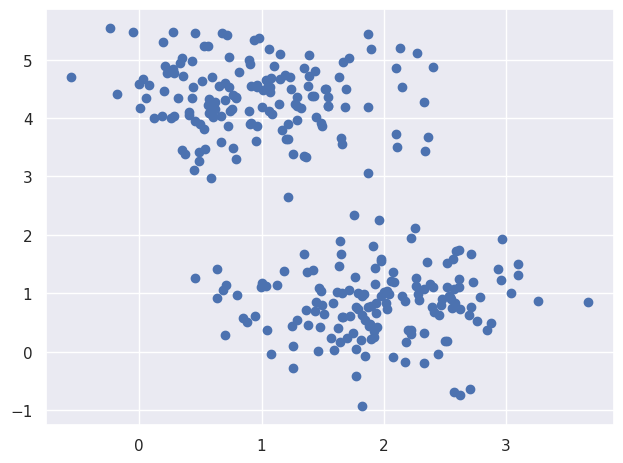

In [ ]:
X_scaled, y_true = make_blobs(n_samples=300, centers=2,
                       cluster_std=0.60, random_state=0)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.tight_layout()

plt.show()

In [ ]:
# Assuming 'red_wine_df' is your DataFrame with the wine dataset

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(red_wine_df.drop('quality', axis=1))  # Exclude quality from clustering

# Hierarchical clustering using Agglomerative Clustering
# Use the same number of clusters as found meaningful in your K Means analysis, e.g., 2
agg_clust = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac = agg_clust.fit_predict(X_scaled)

# Add the cluster labels to your DataFrame for analysis
red_wine_df['cluster'] = y_ac

# Calculate the mean values for each cluster
cluster_means = red_wine_df.groupby('cluster').mean()

# Display the mean values for the clusters
print(cluster_means)

         fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster                                                                 
0             8.319474          0.527899     0.270213        2.538729   
1             8.450000          0.465000     0.880000        2.600000   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
cluster                                                                   
0         0.086812            15.869756             46.454602  0.996745   
1         0.610500            20.000000             57.000000  0.998200   

               pH  sulphates    alcohol   quality  
cluster                                            
0        3.311628   0.656932  10.424264  5.637445  
1        2.900000   1.630000   9.400000  4.500000  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Great ! Now the measures used to create red wines seemed to be much more in-line with the actual means of the twelve features in the red_wine dataset. It seems the sample data is representative of the bigger set.  

Remember that fixed acidity, citric acid, residual sugar, chlorides, density and sulphates were positively associated with quality wine ? This statement is much more nuanced in accordance to hierarchal clustering outputs: cluster 0 with higher quality wine has a lower fixed acidity, citric acid, sugar, chlorides, sulphates and (slighlty) density. On the other hand, the negative feature like volatile acidity is higher for the quality wine than the bad wine. Three features remains consistently negative with a good wine which are sulfur dioxide free sulfur dioxide, total sulfur dioxide and citric acid.

Does these affirmations change the way to make a good bottle of wine ? Not really. We already knew it was important to keep a low level of sulfur dioxide to leave the wine fresher and less industrial. Sulphates were already defined as optional, and not recommended to have a high dosage. Density and alcohol were defined as subjective choices too. The score in residual sugar is similar between the good and bad bottle so it's not that important. Citric acid is still negatively correlated to good wine as the bad wine has a much higher citric acid score.

This analysis differ in the acidity rate, the pH and chlorides. Fixed acidity wad seen as a positive factor, but its rate is higher in the bad wine whereas a higher volatile acidity was higher in cluster 0 than in cluster 1 thus compromising the findings in the k-mean. Because the cluster 1 wine is overall more acid (due to citric acid), it has a lower pH. Yet the most surprising factor is chloride which presence most significantly impact the wine quality. It was previously said that chloride was necesarry to add some saltiness to the wine, but in reality it is better to have almost no chlorine than too much: Chlorine as an industrial component may significantly errode the wine taste even with a medium dose, increasing acidity and decreasing overall quality.

But is this analysis relevant in conjoncture to the overall dataset ? Let's analyse this

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


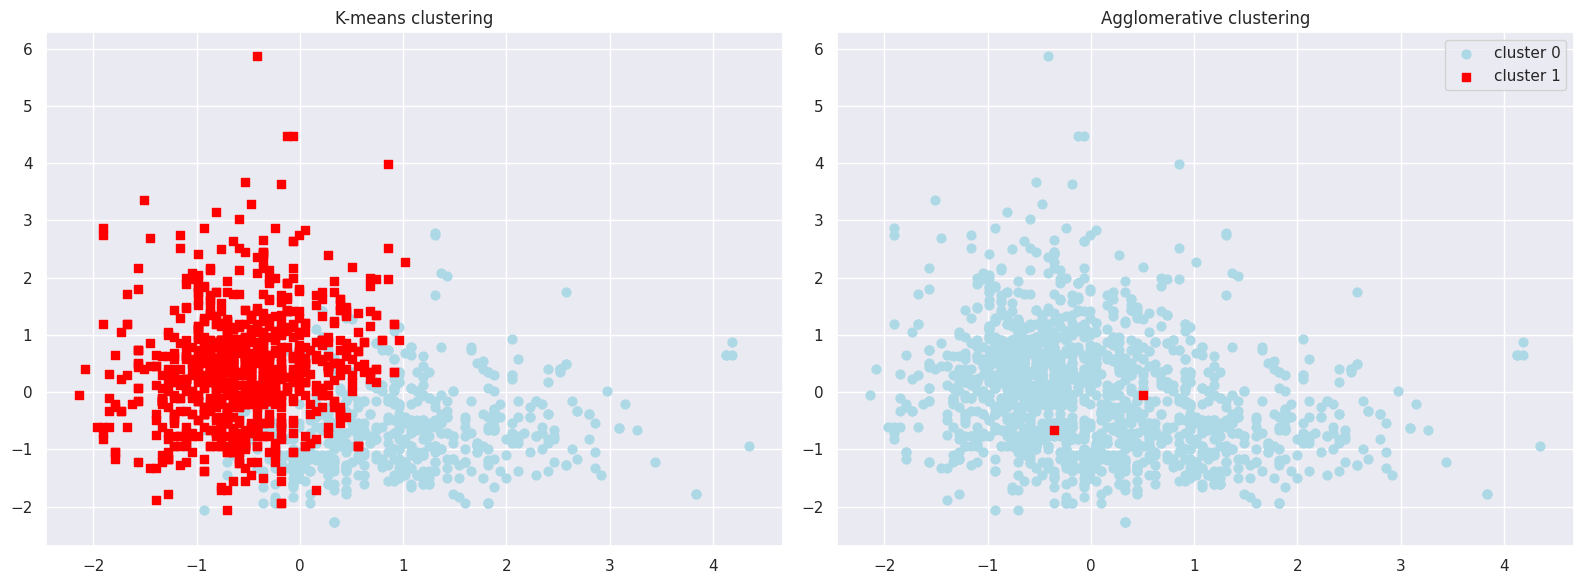

In [ ]:
# Perform the clustering as before
scaler = StandardScaler()
X_scaled = scaler.fit_transform(red_wine_df.drop('quality', axis=1))  # Exclude quality from clustering
agg_clust = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac = agg_clust.fit_predict(X_scaled)

# Create subplots
# Assuming 'red_wine_df' is your DataFrame with the wine dataset

# Scale the data, excluding the 'quality' column for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(red_wine_df.drop('quality', axis=1))

# KMeans clustering
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X_scaled)  # Make sure to use X_scaled for consistency

# Agglomerative clustering
agg_clust = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac = agg_clust.fit_predict(X_scaled)

# Create subplots
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 6))  # Adjusted figsize for better visibility

# K-means clustering plot
ax0.scatter(X_scaled[y_km == 0, 0], X_scaled[y_km == 0, 1], c='lightblue', marker='o', s=40, label='cluster 0')
ax0.scatter(X_scaled[y_km == 1, 0], X_scaled[y_km == 1, 1], c='red', marker='s', s=40, label='cluster 1')
ax0.set_title('K-means clustering')

# Agglomerative clustering plot
ax1.scatter(X_scaled[y_ac == 0, 0], X_scaled[y_ac == 0, 1], c='lightblue', marker='o', s=40, label='cluster 0')
ax1.scatter(X_scaled[y_ac == 1, 0], X_scaled[y_ac == 1, 1], c='red', marker='s', s=40, label='cluster 1')
ax1.set_title('Agglomerative clustering')

# Adjust the legend and layout
plt.legend()
plt.tight_layout()
plt.show()

Due to the complex nature of the dataset, the program was only able to only retrieve the two samples wines among the multitude of wines of the test set. At the end, it seems both are close to each other albeit the quality wine is better located on the x axis at 0.

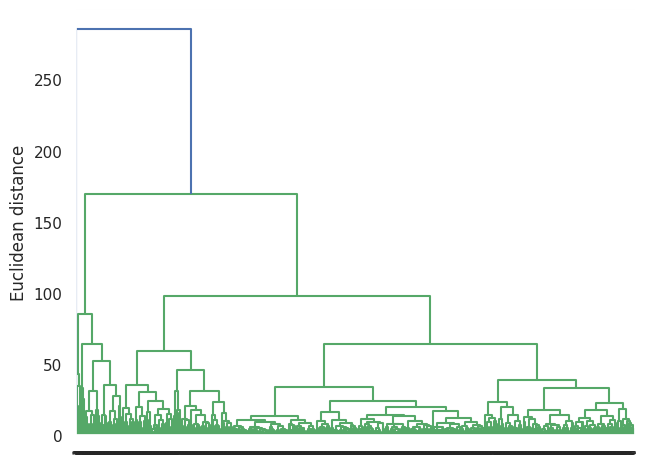

In [ ]:
# Since we have already scaled the data for clustering, we will use the same scaled data for the dendrogram
# Create the linkage matrix using the complete linkage method
row_dendr = dendrogram(row_clusters,
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('./figures/dendrogram.png', dpi=300,
#            bbox_inches='tight')
plt.show()

Again, the complex nature of the wine dataset makes it harder to vizualise properly. The good thing to know is that the 1599 values tend to converge to closer values, by sharing similar proportion of the twelve features. This dataset is indeed good to get an idea on the components that makes up for a good wine.

3. Use Principal Components Analysis to reduce the dimensions of your data. How much of the variation in your data is explained by the first two principal components. How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

We use the PCA to increase the easilibity in using the data. Let's pick the two first variables and decrease dimensions by shriking to 0 the least important coeffcients (similar to Lasso). First we print the variations accross the dimensions of the dataset between the two clusters.

In [ ]:
print(pca.components_)

[[-6.13296554e-03  3.84670318e-04  1.70762392e-04  8.64864277e-03
   6.37476587e-05  2.18852809e-01  9.75669835e-01  3.72590011e-06
  -2.67974079e-04  2.23244247e-04 -6.35985377e-03 -4.31953677e-03
   1.23523376e-05]
 [-2.38646790e-02 -2.02021712e-03 -3.02675864e-03  1.11453592e-02
  -2.37525185e-04  9.75212312e-01 -2.18850408e-01 -2.50439079e-05
   3.26938978e-03  6.25946628e-04  1.46377519e-02  1.15350775e-02
   3.63915653e-05]]


There is a significant difference gap for second feature but lesser for the first yet still significant. Let's compare now after keeping only the two first features.

In [ ]:

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(red_wine_df)
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled) # create X data with single pca vector
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1599, 13)
transformed shape: (1599, 2)


In [ ]:
print(X.iloc[0:5, :])  # For the first 5 rows of the original data
print(X_pca[0:5, :])   # For the first 5 rows of the PCA transformed data

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol   quality  cluster  
0 -0.960246 -0.787823  

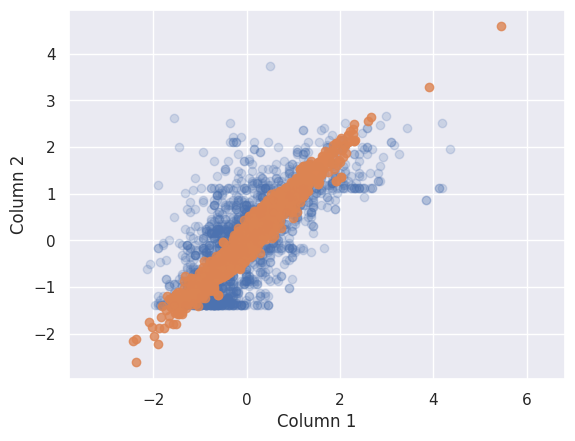

In [ ]:
# Assuming 'X' is a pandas DataFrame and you are interested in the first and third columns
# Replace 'column1' and 'column2' with the actual column names or indices
X_new = pca.inverse_transform(X_pca)  # inverse_transform to return to original space

plt.scatter(X.iloc[:, 0], X.iloc[:, 2], alpha=0.2)  # Original data
plt.scatter(X_new[:, 0], X_new[:, 2], alpha=0.8)    # PCA transformed data
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.axis('equal')
plt.show()

In [ ]:
print(pca.explained_variance_) # explained variance for for each principal component vector

[3.14967246 2.25133491]


In [ ]:
pca.explained_variance_ratio_

array([0.24213098, 0.1730713 ])

The fixed acidity explains about 24.21% of the variance in the data.
The volatile acidity accounts for an additional 17.31%.
Combined, the first two components explain approximately 41.52% of the total variance.

There is some good news and bad news: The good new is that the first compnents features of the dataset so fixed acidity and volatile acidity are responsable to a large number of variations within the dataset, proving their importance. The bad new is that the blue dots are significantly dark in colour when they should be lighter as to signify their minimum importance in shaping the dataset. While the relationship between the two features and the others in this minimized two-dimensional model, one could argue the model lacks consistency given a non 45° degree ligne, with a notable amount of blue dots not being reached by the acidity combination. This is proven by an explanation of 41.52% which suggest more components should be added to consider more variations. Also another problem linked to PCA is that is entirely linear so it is harder to draw relationships between components within a complex dataset with uncommon geometry. Unfortunatelly that is the case for the red wine dataset with its skewed, non-normal distributions and multiple dimensions.

Perhaps should we visualize the overall variation of the dataset by all features over time, this could help to choose a right number of components in reducing dimensionality.

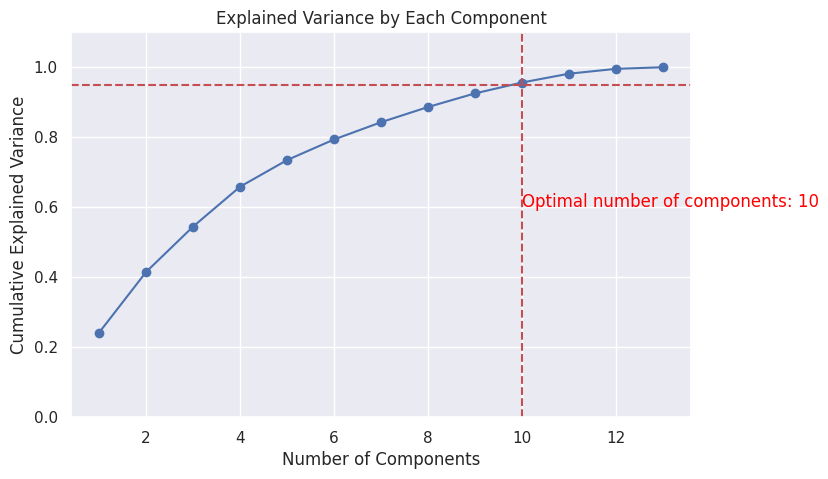

Optimal number of components: 10


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(red_wine_df)

# Apply PCA without specifying n_components to keep all components
pca = PCA()
pca.fit(X_scaled)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the optimal number of components (95% variance explained)
optimal_num_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Explained Variance by Each Component')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=optimal_num_components, color='r', linestyle='--')
plt.text(optimal_num_components, 0.6, f'Optimal number of components: {optimal_num_components}', color = 'red')
plt.ylim(0, 1.1)
plt.show()

print(f"Optimal number of components: {optimal_num_components}")

It seems the optimal number of components is 10 ! There is little doubt that fixed acidity, followed by volatile acidity, is the main component of wine as the relationship between variables seem to follow a logarthimic curve: the first components are responsible the most for the data variations, and it gets stepper once we reach chlorides. The first five components already explain 0.75% of the variations in red wine whereas the following features have a more negligeable effect.

When re-reading the dataset variables, it is worth considering that they seems to be ordonned in decreasing level of importance. We begin by the most obvious choice, fixed acidiy, followed acidity components until we get to more qualitative and aggregagate measures such as pH, alcohol and quality. These last measure have no real impact on the features variations than just being representative of the aggregate effect these features have on the overall acidity (pH), alcohol dosage and quality (by taste)


PCA-reduced data can be used in supervised learning to predict a target variable, such as wine price. Since PCA captures the main variance in the data with fewer dimensions, models built on PCA-transformed data can be more efficient and less prone to overfitting. As one could imagine that a wine concentrating more volatile acid will be cheaper whereas one with a higher fixed acid level be more expensive and vice-versa. However, any of the five features explaining 75% of the variations can be used to predict other features related to wine: For instance, a wine with a low amount of chloride could be organic and therefore will be more expensive than the average industrial red wine.

For predicting a continuous variable like wine price, regression models (e.g., Linear Regression, Random Forest Regression) would be suitable. Then, any of the two first components should be used as predictor. These components, being linear combinations of all original features, may capture more nuanced relationships within the data than the individual features alone (e.g., linear regression for continuous target like price, logistic regression for categorical target) in prediciting the wine price. Train the model to learn the relationship between these components and the wine price. Since these components are derived from the dataset, they should, in theory, provide a condensed yet effective representation of the data for prediction purposes.After training, evaluate the model's performance using standard metrics like Mean Squared Error (MSE) for regression. Use also confusion matrix to get an idea of positive negative / negative positive in making sure the model accurately captures all the variation from acid related to price. If the relationship between the variables and wine price is non-linear, consider using more advanced regression techniques or machine learning models that can capture such complexities.


Find below an attempt, with one replacing X_new with a variable such as wine_price.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your data here (replace with your actual data loading code)
# red_wine_df = pd.read_csv('your_data.csv')
# wine_price = red_wine_df['wine_price']  # assuming 'wine_price' is your target variable

# Prepare the data for PCA
X = red_wine_df.drop(['wine_price'], axis=1)  # drop the target variable
y = red_wine_df['wine_price']  # target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # keeping only two components
X_pca = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4.251963647840863e-20
R-squared: 1.0
